# Data Wrangling 

### 2.1 Introduction

This step focuses on collecting data, organizing it, and making sure it's well defined in the following 4 areas of Data Preparation:

    #1 - Data Load
    #2 - Data Organzation
    #3 - Data Definition
    #4 - Data Cleaning

### 2.1.1 Recap Of Data Science Problem

The purpose of this project is to select the top candidates with the most valuable skills. The low and out-of-range salaries for a job type have made it challenging to attract the best talents. This model will be used to provide guidance for a number of carrer sites to attract the best talents for future Job placement opportunities.



### 2.1.2 Imports

In [46]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os

from library.sb_utils import save_file

### 2.2 Objectives

    Additional Comments:
    Identified the required target value?
    Do I have potentially useful features?
    Do I have any fundamental issues with the data?

In [47]:
#Check the path to the directory where you are currently in
%pwd

'C:\\Users\\narci\\DS-Plus\\Springboard-main\\Git\\Notebooks\\Capstone-2'

### 2.2.1 Fetch Data & Basic Exploration

In [48]:
my_path = 'C:\\Users\\narci\\DS-Plus\\Springboard-main\\Git\\Notebooks\\Capstone-2'

In [49]:
train_data = pd.read_csv(f'{my_path}/Train_rev1.csv')
print(train_data.shape)
train_data.head(4)

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [51]:
train_data.describe()

,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


### 2.3  Data Organzation

In [52]:
#Using a 15% split 
#for the test set may change, if the actual test set size is predefined. 
#In any case we will make sure the test set we choose from our dataset 
#is as similar as it can get to the actual data that it will see in 
#production'''


def mydf_splitter(train_data,num_rows):
    return train_data[:num_rows].copy(),train_data[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(train_data,1100)

print(mydf_train_valid.shape,mydf_test.shape)

(1100, 12) (243668, 12)


In [53]:
#dataframe filter to display just a row  with the title

train_data[train_data.Title == 'Modelling and simulation analyst'].T

,2
Id,12612844
Title,Modelling and simulation analyst
FullDescription,Mathematical Modeller / Simulation Analyst / O...
LocationRaw,"Hampshire, South East, South East"
LocationNormalized,Hampshire
ContractType,NaN
ContractTime,permanent
Company,Gregory Martin International
Category,Engineering Jobs
SalaryRaw,20000 - 40000/annum 20-40K


### Comments

The output above suggests the data organized. Plausible column headings. And I can already see a missing value in the 6th column - Contract Type.

### 2.3.1 Number of Missing Values By Column

Count the number of missing values in each column and sort them.

In [54]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Train_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Id,0,0.000000
FullDescription,0,0.000000
LocationRaw,0,0.000000
LocationNormalized,0,0.000000
Category,0,0.000000
SalaryRaw,0,0.000000
SalaryNormalized,0,0.000000
Title,1,0.000409
SourceName,1,0.000409
Company,32430,13.249281


### Comments

   ContractType has the most missing values, at just over 73%. Company and ContractTime is missing values from 13% and 26%.

### 2.4.  Exploring Duplicates

In [55]:
#Use to find any duplicates
train_data['Title'].value_counts().head()

Business Development Manager    921
Project Manager                 749
Management Accountant           661
Sales Executive                 603
Account Manager                 540
Name: Title, dtype: int64

### Comments

Found duplicates in JoB Title however more exploring is required to see if removing is necessary.

First, we want to be aware which columns (or combination of column) uniquely identify a row. It will make our cleaning much easier if we can identify these things, especially when it comes to duplicates. Afterwards, we can remove these duplicates.

In [56]:
train_data[train_data.duplicated(['Id', 'Title'])]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName


### 2.4.1. Remove Nulls

Now we can assess each column in each dataset for nulls. Let's write a function this time to iterate through the columns to see how much nulls there are.

In [57]:
for column in train_data.columns:
  null_count = len(train_data[train_data[column].isna()])
  print("{} : {}".format(column, null_count))

Id : 0
Title : 1
FullDescription : 0
LocationRaw : 0
LocationNormalized : 0
ContractType : 179326
ContractTime : 63905
Company : 32430
Category : 0
SalaryRaw : 0
SalaryNormalized : 0
SourceName : 1


### 2.4.2 Examine and inspect categorical features

In [58]:
#Examine datatype to mark which data type will play a role in model
train_data.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

### 2.4.3 Use IQR rule to identify potential outliers

In [59]:
stat = train_data.SalaryNormalized.describe()
print(stat)
IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper an lower bounds for suspected outliers are {} and {}.'.format(upper, lower))


count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64
The upper an lower bounds for suspected outliers are 74000.0 and -10000.0.


### 2.4.4. Examine potential outlier below lower bound

In [60]:
#check potential outlier below lower bound
train_data[train_data.SalaryNormalized < 8.5]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName


In [61]:
#check potential outlier above upper bound
train_data.loc[train_data.SalaryNormalized > 222.5, 'Category'].value_counts()

IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creative & Design Jobs            

In [62]:
#check most suspicious potential outliers above upper bound
train_data[(train_data.SalaryNormalized > 222.5) & (train_data.Category == 'IT Jobs')]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
31,27527047,C/C++ Developer,A leading company that provides stock market a...,London,London,NaN,permanent,Indigo 21 Ltd,IT Jobs,25000 - 40000/annum,32500,cv-library.co.uk
32,27527050,Senior PHP Developer,A skilled Senior PHP Developer is required by ...,"Central London, London",Central London,NaN,permanent,Indigo 21 Ltd,IT Jobs,40000 - 50000/annum,45000,cv-library.co.uk
33,27527063,Senior Website Designer,"SENIOR WEBSITE DESIGNER Location: York, East Y...","York, North Yorkshire",York,NaN,permanent,Indigo 21 Ltd,IT Jobs,20000 - 30000/annum,25000,cv-library.co.uk
34,27527077,Business Development Manager,"The Company: Our client are a full service, cr...","Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,IT Jobs,18000 - 24000/annum plus commission OTE 50-60k,21000,cv-library.co.uk
38,27754996,QA Engineer,An expanding software and consultancy services...,"Cambridge, Cambridgeshire",Cambridge,NaN,permanent,Indigo 21 Ltd,IT Jobs,20000 - 40000/annum,30000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
244322,72695854,Mid / Senior Software Developer Shropshire ****k,Mid/Senior Software Developer Shropshire ****k...,Shropshire,Shropshire,NaN,permanent,Exposed Solutions Ltd,IT Jobs,30k - 35k pa,32500,jobsite.co.uk
244325,72695864,Junior Trainer,Junior IT Trainer Top 20 UK Law Firm Central...,City of London,The City,NaN,permanent,Venturi Ltd,IT Jobs,32000.00 - 33k pa + FULL BEN EFITS,32500,jobsite.co.uk
244334,72695898,PHP Software Developer,PHP Software Developer Glasgow Eden Scott s cl...,Glasgow,Glasgow,NaN,permanent,Eden Scott Ltd,IT Jobs,25k - 30k pa + benefits,27500,jobsite.co.uk
244336,72695902,MI Analyst (Reporting Analyst) Trainee,MI Analyst (Reporting Analyst) Trainee. Excel...,Surrey,Surrey,NaN,permanent,Randstad Technologies Limited,IT Jobs,25000.00 - 30000.00 pa,27500,jobsite.co.uk


### Comments

Examine missing Contract Time

In [63]:
train_data.ContractTime.value_counts()


permanent    151521
contract      29342
Name: ContractTime, dtype: int64

### Comments

Crosstab Contract Type and Contract time columns via percentage 

In [64]:
pd.crosstab(train_data.ContractTime.fillna("Unk"), train_data.ContractType.fillna("Unk"))/len(train_data)

ContractType,Unk,full_time,part_time
ContractTime,,,
Unk,0.147090,0.087287,0.026707
contract,0.097782,0.019664,0.002431
permanent,0.487764,0.128121,0.003154


### Comments

Cannot infer the contract type and contract time from each other.

The high-salary potential outliers all appear to be legitmate data. The majority of the roles are Top I.T. roles in the industries known for high salaries. I am determining that these entries are to be legimate.

### 2.4.5 Number Of Missing Values by bar Chart

<AxesSubplot:xlabel='cv-library.co.uk', ylabel='Percent missing'>

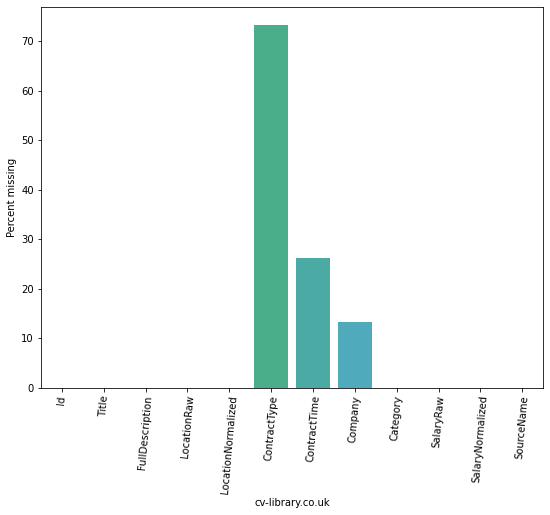

In [65]:
null_vals = train_data.isnull().sum()/len(train_data)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["cv-library.co.uk","Percent missing"]
plt.figure(figsize = (9,7))
plt.xticks(rotation=85)
sns.barplot(x ="cv-library.co.uk",y ="Percent missing",data = null_vals)

### Visualize Missing Values by Column

<AxesSubplot:>

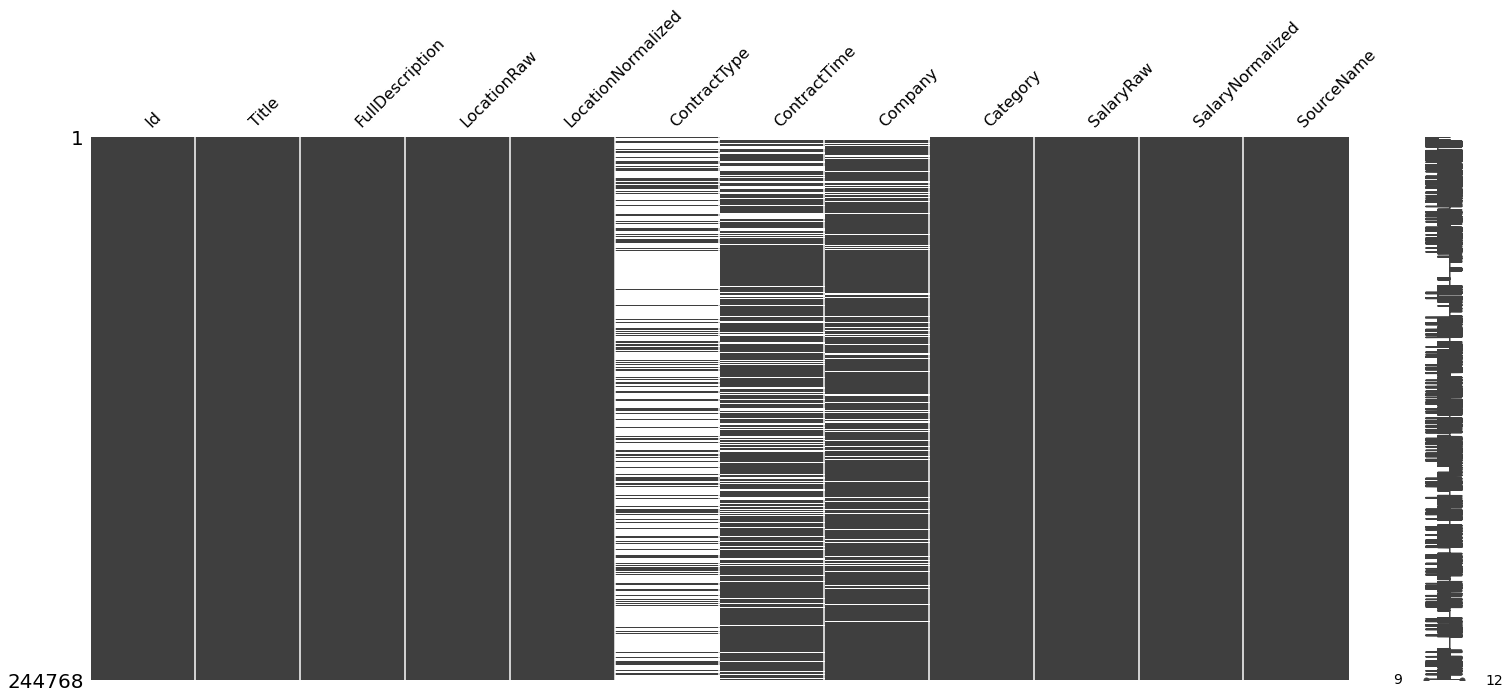

In [66]:
msno.matrix(train_data)

### 2.4.6 Data Definition - (Take a deeper look at the data)

In [67]:
#Call the info method on train_data to see a summary of the data.info 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [68]:
train_data.select_dtypes('object')

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SourceName
0,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
1,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,cv-library.co.uk
2,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,cv-library.co.uk
3,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,cv-library.co.uk
4,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...
244763,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244764,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244765,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244766,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,hays.co.uk


### 2.5. Data Cleaning: Scrubbing Data 

In [69]:
def Scrub_Data(data, columns, axis, vals, names):
    #drop useless columns
    data = data.drop(columns, axis = 1)
    #detect the missing data
    missingcounts = data.isnull().sum()
    missingcols = [col for col in missingcounts.keys() if missingcounts[col] != 0]
    #fill the missing data with specific values
    values = dict(zip(missingcols, vals))
    data = data.fillna(value = values)
    #rename the columns
    data.columns = names
    return data


In [70]:
#fill missing data for "ContractType", "ContractTime", "Company" with Unknown
train_data = train_data.fillna("Unknown")


#rename the columns
names = ["Job Code", "Title", "Job Description", "Region", "Location", "ContractType", "ContractTime", "Company", "Category", "Salary_Range", "Actual_Salary","Source_Name"]
train_data.columns = names


In [71]:
train_data.head()

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Actual_Salary,Source_Name
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [72]:
train_data.isnull().sum()

Job Code           0
Title              0
Job Description    0
Region             0
Location           0
ContractType       0
ContractTime       0
Company            0
Category           0
Salary_Range       0
Actual_Salary      0
Source_Name        0
dtype: int64

### 2.6 Examine Top Job Markets 

###          2.6.1   I.T. Job Market

In [73]:
itjobs_data = train_data[(train_data.Actual_Salary) & (train_data.Category == 'IT Jobs')]

In [74]:
itjobs_data .head(6)

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Actual_Salary,Source_Name
2487,55408230,Configuration Analyst,"Configuration Analyst, London, ****k DOE Confi...",London,London,full_time,permanent,Migration,IT Jobs,"From 40,000 to 49,999 per year + ( 40,000 - 49...",44999,planetrecruit.com
2503,55408436,"Data Centre Shift Lead, West London, up to ***...","Data Centre Shift Lead, West London, up to ***...",London,London,full_time,permanent,JOBG8,IT Jobs,"From 40,000 to 49,999 per year + ( 40,000 - 49...",44999,planetrecruit.com
2506,55408452,Website/Portal Systems Development Manager (Ja...,Website/Portal Systems Development ManagerLond...,London,London,full_time,permanent,JOBG8,IT Jobs,"From 70,000 to 79,999 per year + ( 70,000 - 79...",74999,planetrecruit.com
2508,55408456,B2B Telesales Executive,Are you an experienced Telesales Executive? If...,Gloucestershire,Gloucestershire,full_time,permanent,JOBG8,IT Jobs,"From 20,000 to 29,999 per year + ( 20,000 - 29...",24999,planetrecruit.com
2581,55409435,Application Team Leader,Essex County Fire & Rescue have a vacancy for ...,Essex,Essex,full_time,permanent,JOBG8,IT Jobs,"Up to 36,313 per year + 34549.00-36313.00",36313,planetrecruit.com
2627,55409778,Online Infrastructure Analyst,Job Title: Online Infrastructure Analyst Refer...,Buckinghamshire,Buckinghamshire,full_time,permanent,JOBG8,IT Jobs,"From 30,000 to 39,999 per year + ( 30,000 - 39...",34999,planetrecruit.com


In [75]:
# find any IT Title duplicates
itjobs_data['Title'].value_counts().head()

Business Development Manager       7
Oracle Technical Team Leader       5
Test Analyst                       5
IT Support Engineer                5
Business Intelligence Developer    4
Name: Title, dtype: int64

### Comments

Duplicates found in IT Job Titles all have unique Job descriptions - No need to consolidate 

### 2.6.2 Engineering Job Market

In [76]:
engjbs_data = train_data[(train_data.Actual_Salary) & (train_data.Category == 'Engineering Jobs')]

In [77]:
engjbs_data.head(6)

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Actual_Salary,Source_Name
174,46172940,CNC Turner,Ideally you will be apprentice trained having ...,"Bradford, West Yorkshire",Bradford,Unknown,permanent,The Works Uk Ltd,Engineering Jobs,11.78/hour 11.78 p.hr + overtime,22617,cv-library.co.uk
1601,48300471,Horizontal Borer,We are looking to appoint experienced CNC Prog...,"newcastle, Tyne and Wear",Newcastle Upon Tyne,Unknown,permanent,Asset Appointments,Engineering Jobs,20.81/hour,39955,cv-library.co.uk
2309,54460861,Machine Tool Fitter,Machine tool fitters to work shifts on the ass...,"Keighley, West Yorkshire",Keighley,Unknown,permanent,The Works Uk Ltd,Engineering Jobs,11.37 - 15.15/hour,25459,cv-library.co.uk
3344,57844747,CNC Horizontal Borer,Our client has an immediate requirement for a ...,"Bradford, West Yorkshire",Bradford,Unknown,contract,Network Employment Consultancy,Engineering Jobs,11.37 - 13.50/hour Depending on Experience,23875,cv-library.co.uk
3345,57845951,Quality Engineer,Quality Engineer with view to progress to Qual...,"Bradford, West Yorkshire",Bradford,Unknown,contract,Network Employment Consultancy,Engineering Jobs,11.37 - 13.50/hour Depending on Experience,23875,cv-library.co.uk
3400,58373449,Field Service Engineer,The Company Our client is a growing organisati...,"Slough, Berkshire Berkshire South East",Slough,Unknown,permanent,MTrec,Engineering Jobs,13.01 per hour,24979,totaljobs.com


### 2.6.3 Accounting & Finance Job Market

In [78]:
accts_data = train_data[(train_data.Actual_Salary) & (train_data.Category == 'Accounting & Finance Jobs')]

In [79]:
accts_data.head(6)

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Actual_Salary,Source_Name
5335,62009032,Intelligence Researcher Insurance Fraud Enfor...,Intelligence Researcher Insurance Fraud Enfor...,London Ec,London,Unknown,Unknown,Triumph Consultants,Accounting & Finance Jobs,"13.93 ph PAYE, noting that Ltd/Umbrella compan...",26745,MyUkJobs
7875,65055810,Customer Service Associates Collections,Collections Officers are responsible for deali...,Rotherham,Rotherham,Unknown,Unknown,RBS,Accounting & Finance Jobs,"17,937 (including benefits package)",17937,MyUkJobs
7886,65056381,Customer Adviser – Retail Telephony,"At RBS, the vision of UK Retail (including the...",Manchester,Manchester,Unknown,Unknown,RBS,Accounting & Finance Jobs,"18,485 including benefits package",18485,MyUkJobs
8481,65198949,Senior Intermediary Support Advisor,Do you have excellent Customer Service skills?...,"Coventry, West Midlands",Coventry,Unknown,permanent,Brite Recruitment,Accounting & Finance Jobs,18374 - 25265/annum,21819,cv-library.co.uk
9161,65763976,Appeals Submissions Officer with iWorld experi...,Appeals Submissions Officer with iWorld experi...,London N,North London,Unknown,Unknown,Triumph Consultants,Accounting & Finance Jobs,"22.68 ph PAYE, noting that Ltd/Umbrella compan...",43545,MyUkJobs
9464,65900486,Local Business Manager Morecambe,Local Business Manager Our impressive growth p...,"Morecambe, Lancashire",Morecambe,Unknown,permanent,Santander,Accounting & Finance Jobs,25999 - 29999/annum competitive bonus scheme,27999,cv-library.co.uk


### 2.7 Histogram of all Job Salaries

<AxesSubplot:>

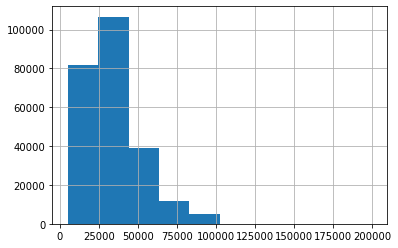

In [80]:
%matplotlib inline
train_data.Actual_Salary.hist()

### 2.8 Histogram of IT Salaries

<AxesSubplot:>

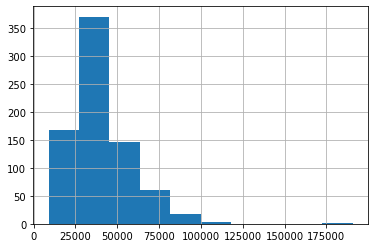

In [81]:
itjobs_data.Actual_Salary.hist()

### 2.9 Histogram of Engineering Salaries

<AxesSubplot:>

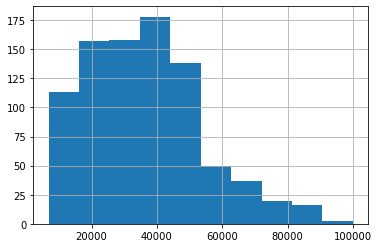

In [82]:
engjbs_data.Actual_Salary.hist()

### 3.0 Histogram of Accounting & Finance Salaries

<AxesSubplot:>

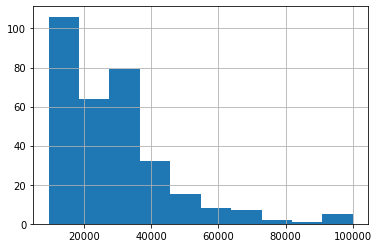

In [83]:
accts_data.Actual_Salary.hist()

### Job / Salaries in Descending Order 

In [84]:
sort_order = train_data[["Category","Actual_Salary"]].groupby("Category").mean().sort_values(by = "Actual_Salary", ascending=False).reset_index().Category.values

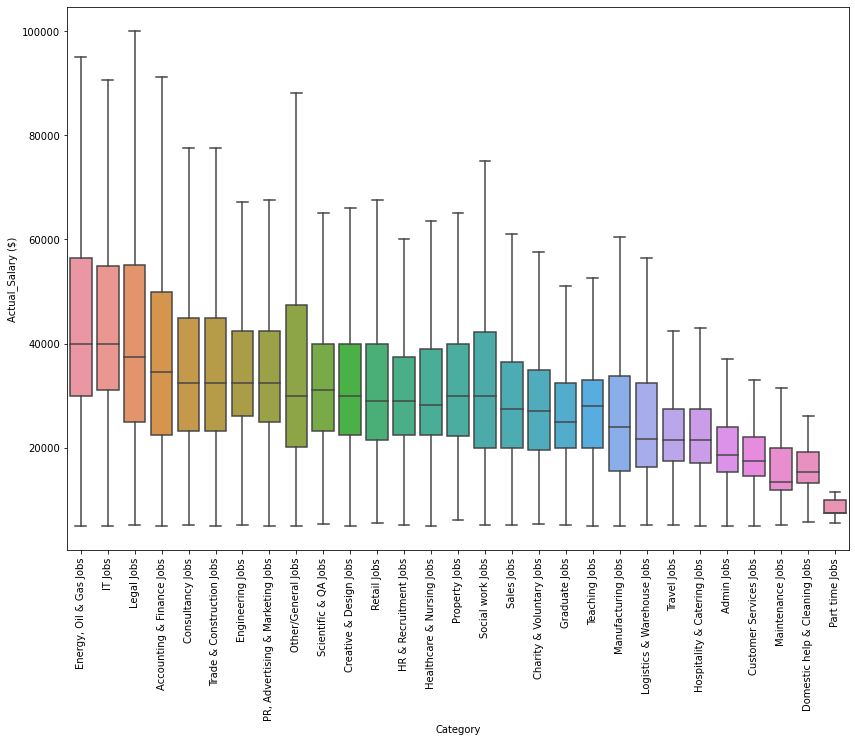

In [85]:
plt.subplots(figsize=(14, 10))
sns.boxplot(x='Category', y='Actual_Salary', data=train_data, order=sort_order, showfliers=False)
plt.xticks(rotation='vertical')
plt.ylabel('Actual_Salary ($)')
plt.xlabel('Category');
